In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'		 GA_Image_Classification   Plants_dataset
 dataset_male_female		 GoldFish		   Smart_Fish_App
 fish_detection_classification	'My Drive'


In [ ]:
%cd '/content/gdrive/MyDrive/dataset_male_female/Betta'

/content/gdrive/MyDrive/dataset_male_female/Betta


In [ ]:
epochs = 50
lr = 1e-3
batch_size=128
data = []
labels = []

In [ ]:
size=224

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1/255)

In [ ]:
test_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
target_size=(size,size)
target_size

(224, 224)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_male_female/Betta',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

Found 335 images belonging to 2 classes.


In [ ]:
validation_generator = test_gen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_male_female/Betta',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

Found 335 images belonging to 2 classes.


In [ ]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
len(train_generator.classes)

335

In [ ]:
train_generator.class_mode

'binary'

In [ ]:
x,y = train_generator.next()

In [ ]:
x

array([[[[6.56139135e-01, 6.87511683e-01, 6.99276388e-01],
         [6.54901981e-01, 6.86274529e-01, 6.98039234e-01],
         [6.54901981e-01, 6.86274529e-01, 6.98039234e-01],
         ...,
         [7.37254918e-01, 7.52941251e-01, 7.49019623e-01],
         [7.29862928e-01, 7.45549202e-01, 7.41627634e-01],
         [7.17039108e-01, 7.33941376e-01, 7.29411781e-01]],

        [[6.57579601e-01, 6.88952148e-01, 7.00716853e-01],
         [6.58591092e-01, 6.89963639e-01, 7.01728344e-01],
         [6.57114625e-01, 6.88487172e-01, 7.00251877e-01],
         ...,
         [7.36933529e-01, 7.52619803e-01, 7.48698235e-01],
         [7.26429164e-01, 7.42115438e-01, 7.38193870e-01],
         [7.15819359e-01, 7.35161126e-01, 7.29411781e-01]],

        [[6.54901981e-01, 6.86274529e-01, 6.98039234e-01],
         [6.55127645e-01, 6.86500192e-01, 6.98264897e-01],
         [6.56604171e-01, 6.87976718e-01, 6.99741423e-01],
         ...,
         [7.34494090e-01, 7.50180364e-01, 7.46258795e-01],
         [

In [ ]:
x[0].shape

(224, 224, 3)

In [ ]:
x[0]

array([[[0.65613914, 0.6875117 , 0.6992764 ],
        [0.654902  , 0.6862745 , 0.69803923],
        [0.654902  , 0.6862745 , 0.69803923],
        ...,
        [0.7372549 , 0.75294125, 0.7490196 ],
        [0.7298629 , 0.7455492 , 0.74162763],
        [0.7170391 , 0.7339414 , 0.7294118 ]],

       [[0.6575796 , 0.68895215, 0.70071685],
        [0.6585911 , 0.68996364, 0.70172834],
        [0.6571146 , 0.6884872 , 0.7002519 ],
        ...,
        [0.7369335 , 0.7526198 , 0.74869823],
        [0.72642916, 0.74211544, 0.73819387],
        [0.71581936, 0.7351611 , 0.7294118 ]],

       [[0.654902  , 0.6862745 , 0.69803923],
        [0.65512764, 0.6865002 , 0.6982649 ],
        [0.6566042 , 0.6879767 , 0.6997414 ],
        ...,
        [0.7344941 , 0.75018036, 0.7462588 ],
        [0.72276986, 0.73845613, 0.73453456],
        [0.7145996 , 0.7363809 , 0.7294118 ]],

       ...,

       [[0.36665076, 0.40784317, 0.37647063],
        [0.36584908, 0.40506476, 0.3736922 ],
        [0.37192976, 0

In [ ]:
model = Sequential()
model.add(InceptionV3(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable=False

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_95 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1024)              2

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
train_generator.filenames

['Betta_Female/Copy of 20220827_123350.jpg',
 'Betta_Female/Copy of 20220827_123350213.jpg',
 'Betta_Female/Copy of 20220827_123351.jpg',
 'Betta_Female/Copy of 20220827_123351632.jpg',
 'Betta_Female/Copy of 20220827_123352.jpg',
 'Betta_Female/Copy of 20220827_123353.jpg',
 'Betta_Female/Copy of 20220827_123401.jpg',
 'Betta_Female/Copy of 20220827_12340156.jpg',
 'Betta_Female/Copy of 20220827_123402.jpg',
 'Betta_Female/Copy of 20220827_123402545.jpg',
 'Betta_Female/Copy of 20220827_123403.jpg',
 'Betta_Female/Copy of 20220827_123408.jpg',
 'Betta_Female/Copy of 20220827_1234085.jpg',
 'Betta_Female/Copy of 20220827_123420.jpg',
 'Betta_Female/Copy of 20220827_123443.jpg',
 'Betta_Female/Copy of 20220827_123456.jpg',
 'Betta_Female/Copy of 20220827_12345661.jpg',
 'Betta_Female/Copy of 20220827_123457.jpg',
 'Betta_Female/Copy of 20220827_123458.jpg',
 'Betta_Female/Copy of 20220827_123459.jpg',
 'Betta_Female/Copy of 20220827_1234595.jpg',
 'Betta_Female/Copy of 20220827_123500.j

In [ ]:
len(train_generator.filenames), batch_size , len((train_generator.filenames))//batch_size

(335, 128, 2)

In [ ]:
model.fit(train_generator, steps_per_epoch=len((train_generator.filenames))//batch_size,epochs=4,validation_data=validation_generator,validation_steps=len(validation_generator.filenames)//batch_size)

Epoch 1/4
2/2 [==============================] - 75s 35s/step - loss: 1.3779 - accuracy: 0.5942 - val_loss: 0.4871 - val_accuracy: 0.7617
Epoch 2/4
2/2 [==============================] - 13s 10s/step - loss: 0.8156 - accuracy: 0.8309 - val_loss: 0.4004 - val_accuracy: 0.8008
Epoch 3/4
2/2 [==============================] - 13s 10s/step - loss: 0.8465 - accuracy: 0.7778 - val_loss: 0.3841 - val_accuracy: 0.8242
Epoch 4/4
2/2 [==============================] - 13s 10s/step - loss: 0.7177 - accuracy: 0.8164 - val_loss: 0.2872 - val_accuracy: 0.8789


In [ ]:
model.save('Betta_Gender.h5')

In [ ]:
img_path = '/content/gdrive/MyDrive/dataset_male_female/Betta/Betta_Female/Copy of 20220827_123350.jpg'

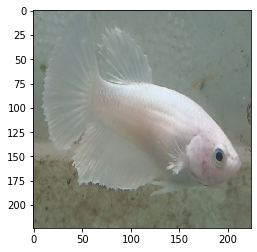

In [ ]:
img = load_img(img_path,target_size=(size,size,3))
plt.imshow(img)

In [ ]:
img = img_to_array(img)

In [ ]:
img = img/255.0

In [ ]:
img = img.reshape(1,size,size,3)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img)

array([[0.25524107]], dtype=float32)

In [ ]:
from keras.models import load_model
models = load_model('Betta_Gender.h5')
def get_classes(data):
  prob = models.predict(data)[0][0]
  if prob<=0.5:
    return 'Bettta Female', (1 - prob)*100
  else:
    return 'Betta Male', prob*100

In [ ]:
get_classes(img)

('Bettta Female', 74.47589337825775)

In [ ]:
def get_prediction(img_path):
  img = load_img(img_path, target_size=(size, size, 3))
  plt.imshow(img)
  img = img_to_array(img)
  img = img/255.0
  img = img.reshape(1, size, size, 3)
  pred, prob = get_classes(img)
  return pred, prob

('Betta Male', 99.99711513519287)

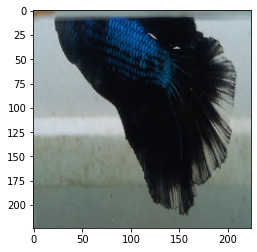

In [ ]:
get_prediction('/content/gdrive/MyDrive/dataset_male_female/Betta/Betta_Male/Copy of 20220827_124057.jpg')